# **Load Libraries and Dataset**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
# Load the dataset (edit directory path)
df = pd.read_csv('/content/drive/MyDrive/airquality.csv')

In [ ]:
# Number of records in the dataset
df.shape

(2191, 19)

In [ ]:
df.head()

,Title,Date_Published,Country,Name,Overall_rating,Review Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,"""Food quality up to the regular standards""",6th May 2023,(Sweden),25 reviews\nS Karsen,8/10,✅ Trip Verified | Old aircraft with old inter...,Boeing 777-300,Solo Leisure,Business Class,Phuket to Doha,April 2023,4.0,5.0,3.0,5.0,4.0,3.0,4,yes
1,"""free wi-fi isn't included""",6th May 2023,(Sweden),25 reviews\nS Karsen,10/10,✅ Trip Verified | Service on point as always!...,Boeing 787-8,Solo Leisure,Business Class,Doha to Phuket,March 2023,5.0,5.0,4.0,5.0,5.0,3.0,4,yes
2,"""Service on point as always""",6th May 2023,(Sweden),25 reviews\nS Karsen,9/10,✅ Trip Verified | Always good to travel busin...,Boeing 787-8,Solo Leisure,Business Class,Stockholm to Doha,March 2023,5.0,5.0,3.0,5.0,4.0,3.0,5,yes
3,"""the service was top notch""",5th May 2023,(Qatar),Alwaleed Althani,10/10,✅ Trip Verified | Qatar Airways has three dail...,A350-900,Solo Leisure,Business Class,Johannesburg to Doha,May 2023,5.0,5.0,4.0,4.0,5.0,5.0,5,yes
4,"""friendly and helpful crew""",4th May 2023,(Ireland),M Mayre,9/10,✅ Trip Verified | Enjoyable flight with frien...,NaN,Family Leisure,Economy Class,Nairobi to Dublin via Doha,May 2023,4.0,5.0,4.0,3.0,4.0,3.0,4,yes


In [ ]:
df.columns

Index(['Title', 'Date_Published', 'Country', 'Name', 'Overall_rating',
       'Review Text', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route',
       'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity',
       'Value For Money', 'Recommended'],
      dtype='object')

In [ ]:
# statistical Summary of the dataset
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,2154.000000,2153.000000,2131.000000,2021.000000,1732.000000,893.000000,2191.000000
mean,3.997214,4.274501,3.912248,4.060861,3.790416,3.760358,3.982656
std,1.156974,1.092125,1.218902,1.045858,1.431857,1.253120,1.235942
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# **Data Analysis**

<ipython-input-11-056b98a6f507>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation plot of the features present in the data')

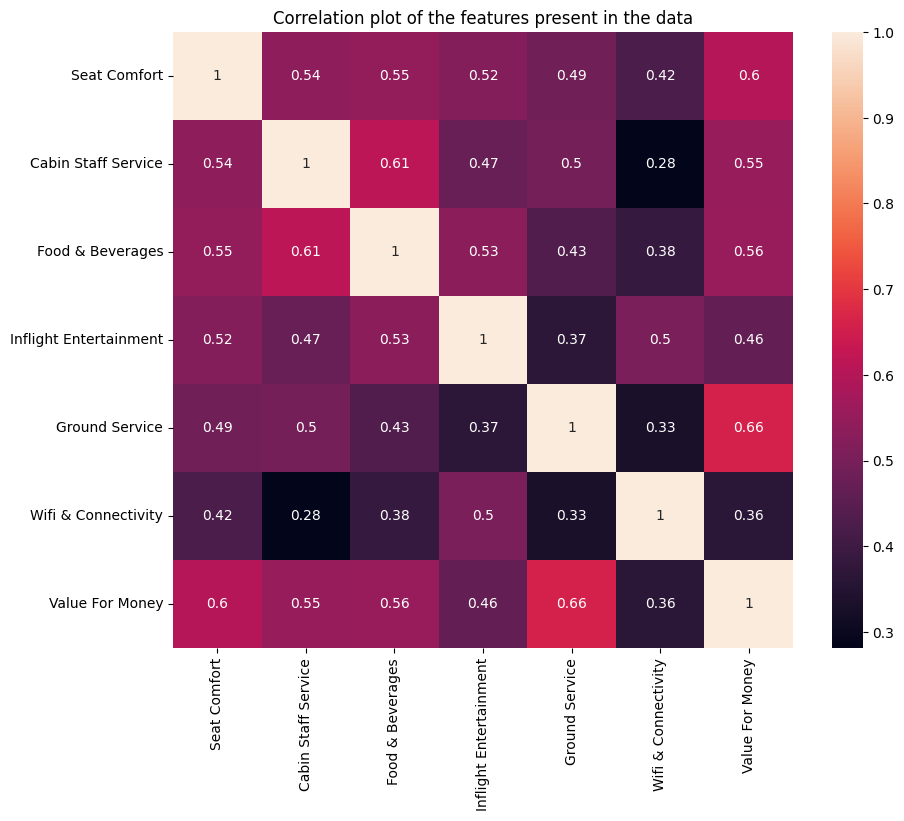

In [ ]:
# Correlation plot of the features present in the data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation plot of the features present in the data')

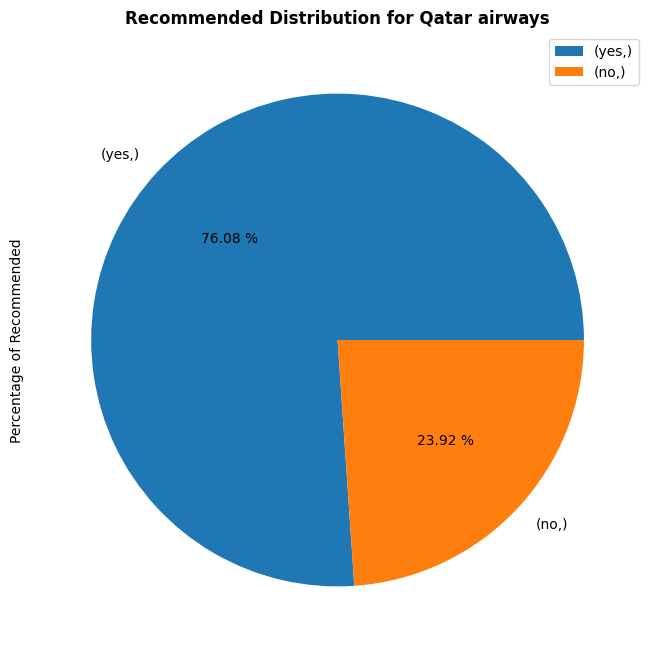

In [ ]:
# Recommended Distribution for Qatar airways in pie plot

df[['Recommended']].value_counts().to_frame().plot(kind='pie', y=0, autopct='%.2f %%', figsize=(15,8)  )
plt.ylabel('Percentage of Recommended')
plt.title('Recommended Distribution for Qatar airways', fontweight='bold')
plt.show()



Text(0.5, 1.0, 'Percentage Recommendation Distribution Across Seat types')

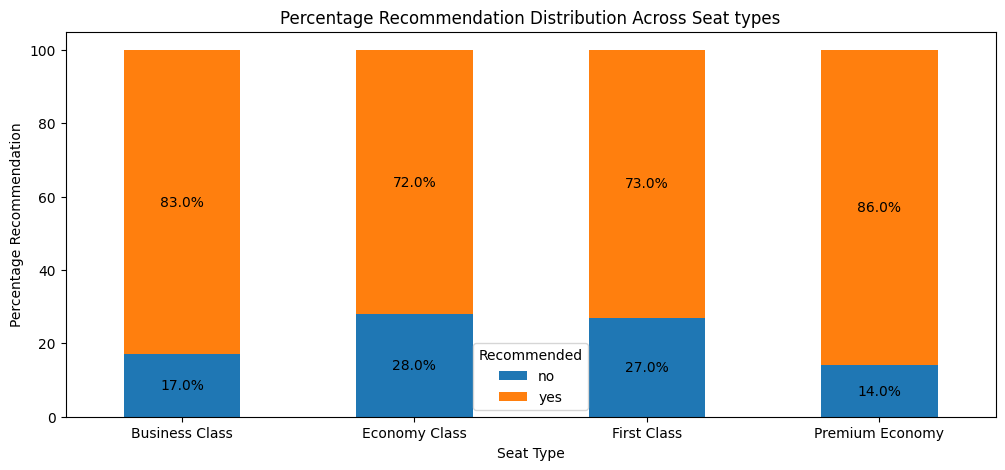

In [ ]:
# Percentage Recommendation Distribution Across Seat types

df_seattype=df.groupby('Seat Type')['Recommended'].value_counts().to_frame().rename(columns={'Recommended': 'count'}).reset_index()
df_seattype['perc']=[681/(681+143), 143/(681+143), 956/(956+ 371), 371/(956+ 371), 24/(24+9),9/(24+9), 6/(6+1), 1/(6+1)]
df_seattype['perc']=df_seattype['perc'] * 100
df_seattype['perc']=df_seattype['perc'].round()
ax=df_seattype.pivot_table(values='perc', index='Seat Type', columns='Recommended')\
.plot(kind='bar', stacked=True, rot=0, xlabel='Seat Type', ylabel='Percentage Recommendation', figsize=(12,5))
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [str(v.get_height()) + '%' if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.title('Percentage Recommendation Distribution Across Seat types')

Text(0.5, 1.0, 'Percentage Recommendation Distribution Across Type Of Traveller')

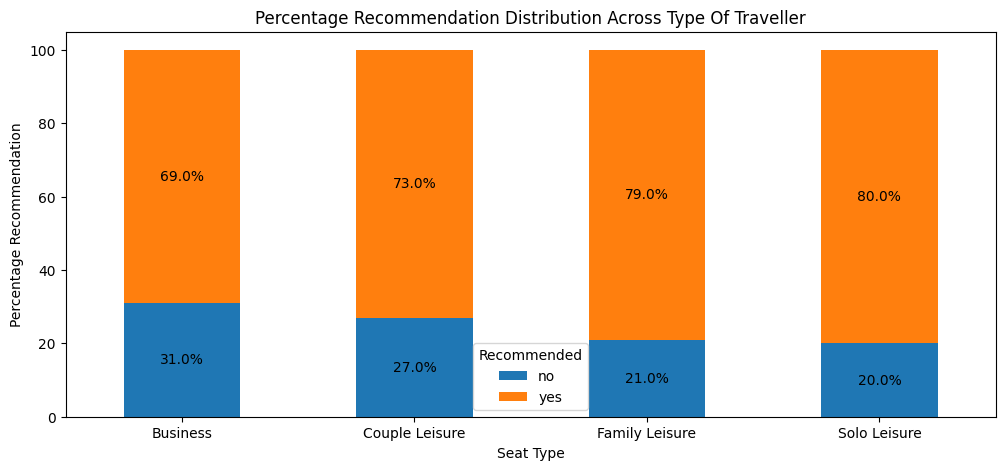

In [ ]:
# Percentage Recommendation Distribution Across Type Of Traveller

df_TypeOfTraveller=df.groupby('Type Of Traveller')['Recommended'].value_counts().to_frame().rename(columns={'Recommended': 'count'}).reset_index()
df_TypeOfTraveller['perc']=[202/(202+89), 89/(202+89), 306/(306+115), 115/(306+115), 225/(225+ 59), 59/(225+ 59),607/(607+153), 153/(607+153)]
df_TypeOfTraveller['perc']=df_TypeOfTraveller['perc'] * 100
df_TypeOfTraveller['perc']=df_TypeOfTraveller['perc'].round()
ax=df_TypeOfTraveller.pivot_table(values='perc', index='Type Of Traveller', columns='Recommended')\
.plot(kind='bar', stacked=True, rot=0, xlabel='Seat Type', ylabel='Percentage Recommendation', figsize=(12,5))
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [str(v.get_height()) + '%' if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.title('Percentage Recommendation Distribution Across Type Of Traveller')

Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Seat Comfort')

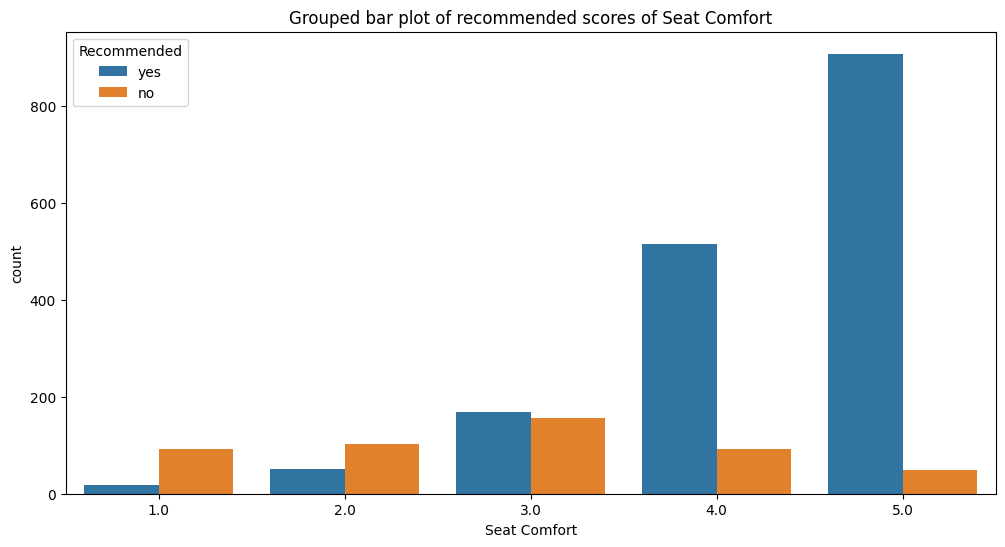

In [ ]:
#Grouped bar plot of recommended scores of Seat Comfort
plt.figure(figsize=(12,6))
sns.countplot(x=df['Seat Comfort'], data =df, hue='Recommended')
plt.title('Grouped bar plot of recommended scores of Seat Comfort')

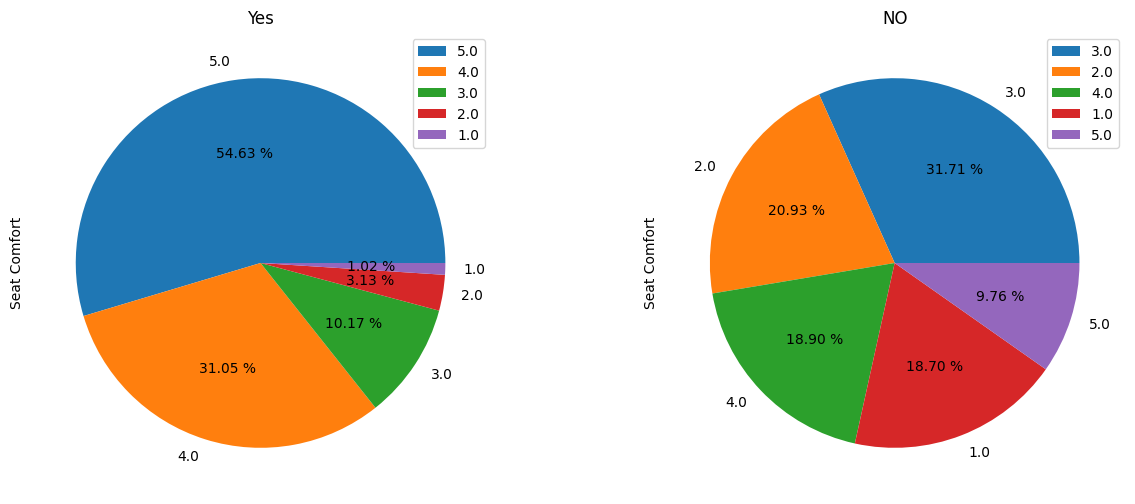

In [ ]:
# Distribution of Seat Comfort ratings amidst customers who recommended and did not
yes=df[df['Recommended']=='yes']['Seat Comfort'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Seat Comfort'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Seat Comfort', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1


Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Cabin Staff Service')

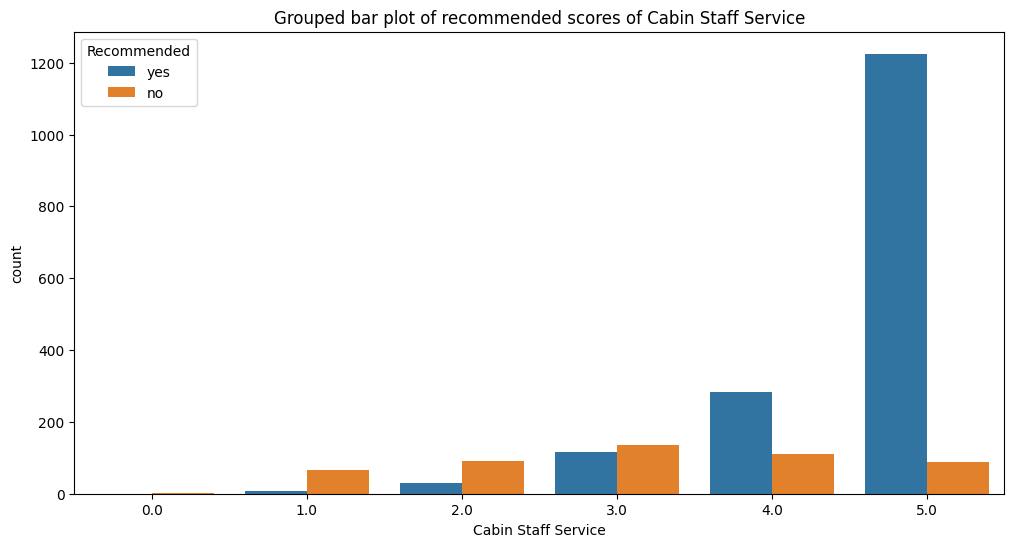

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Cabin Staff Service'], data=df, hue='Recommended')
plt.title('Grouped bar plot of recommended scores of Cabin Staff Service')

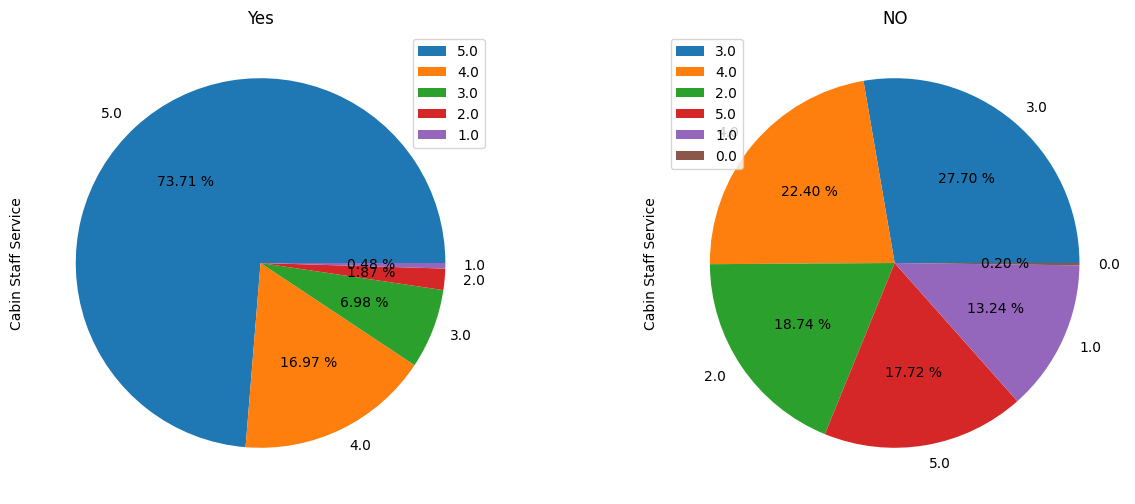

In [ ]:
# Distribution of Cabin Staff Service ratings amidst customers who recommended and did not

yes=df[df['Recommended']=='yes']['Cabin Staff Service'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Cabin Staff Service'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Cabin Staff Service', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1


Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Food & Beverages')

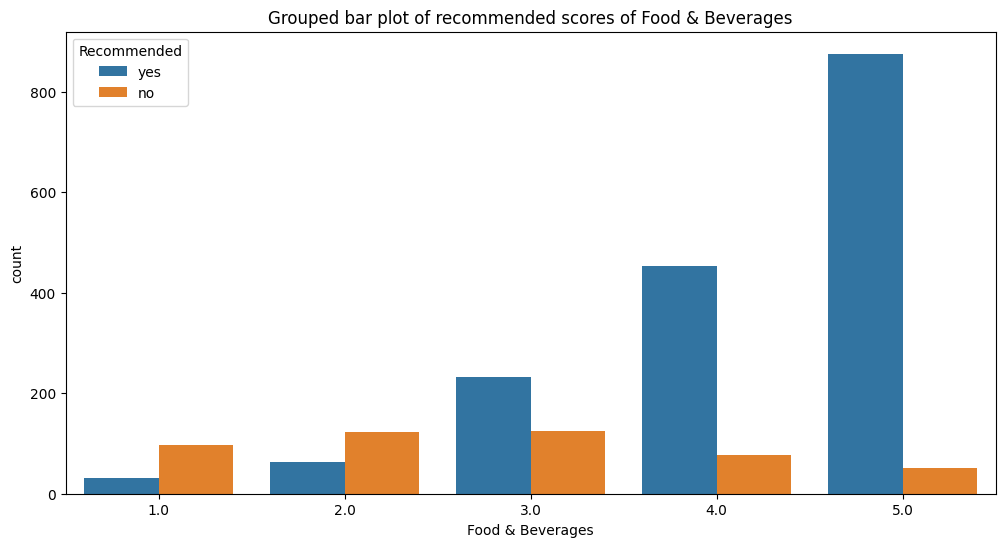

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Food & Beverages'], data=df, hue='Recommended')
plt.title('Grouped bar plot of recommended scores of Food & Beverages')

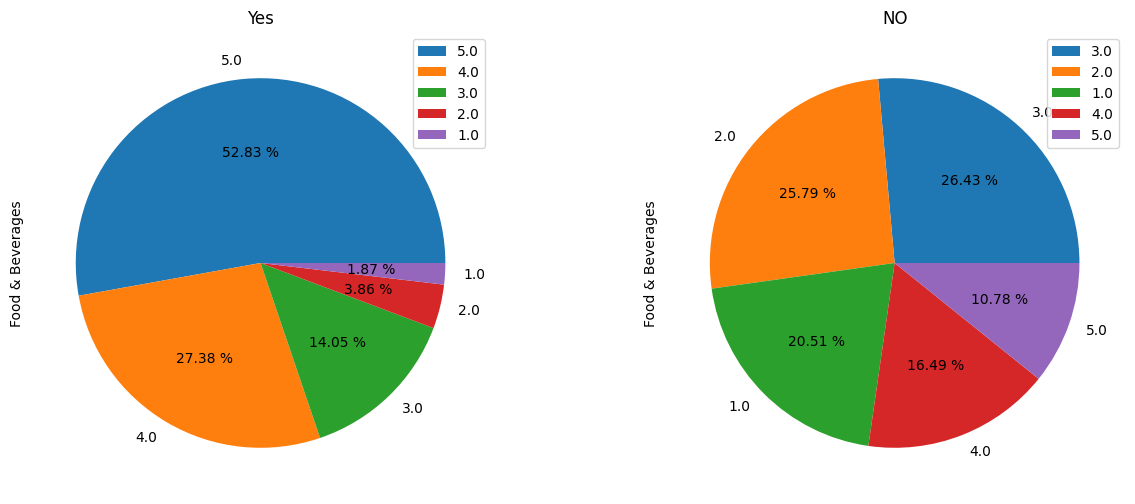

In [ ]:
# Distribution of Food & Beverages ratings amidst customers who recommended and did not

yes=df[df['Recommended']=='yes']['Food & Beverages'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Food & Beverages'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Food & Beverages', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1


Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Ground Services')

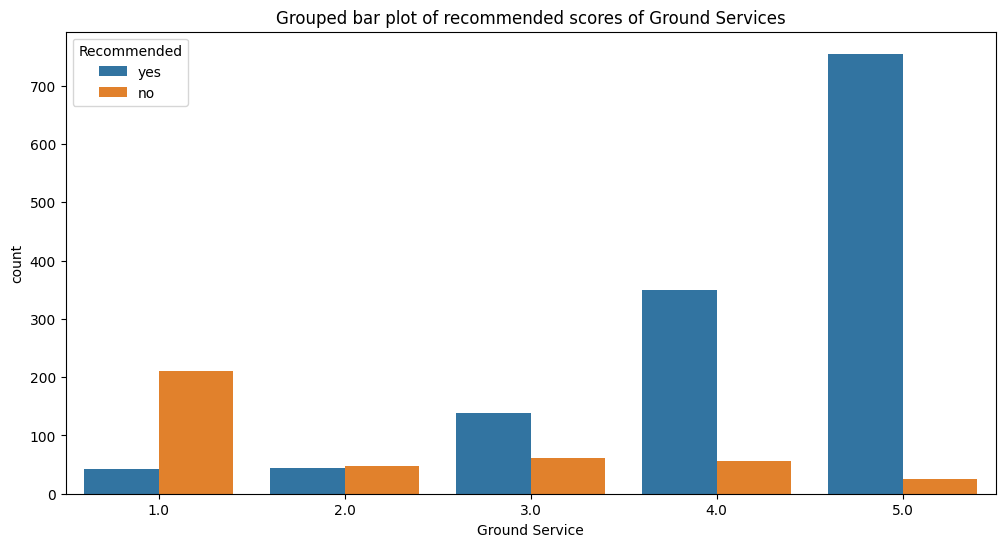

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Ground Service'], data=df, hue='Recommended')
plt.title('Grouped bar plot of recommended scores of Ground Services')

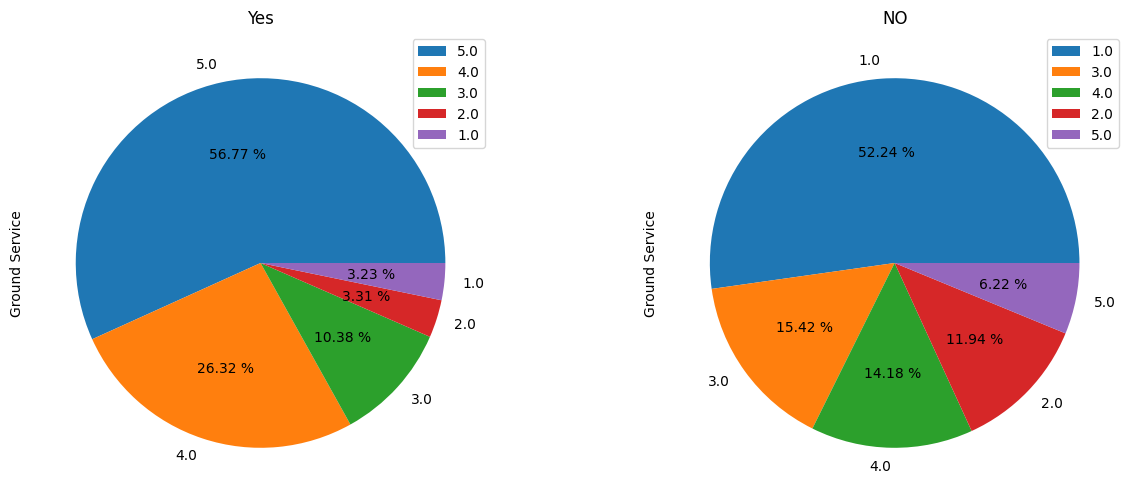

In [ ]:
#Distribution of Ground Service ratings amidst customers who recommended and did not
yes=df[df['Recommended']=='yes']['Ground Service'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Ground Service'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Ground Service', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1


Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Inflight Entertainment')

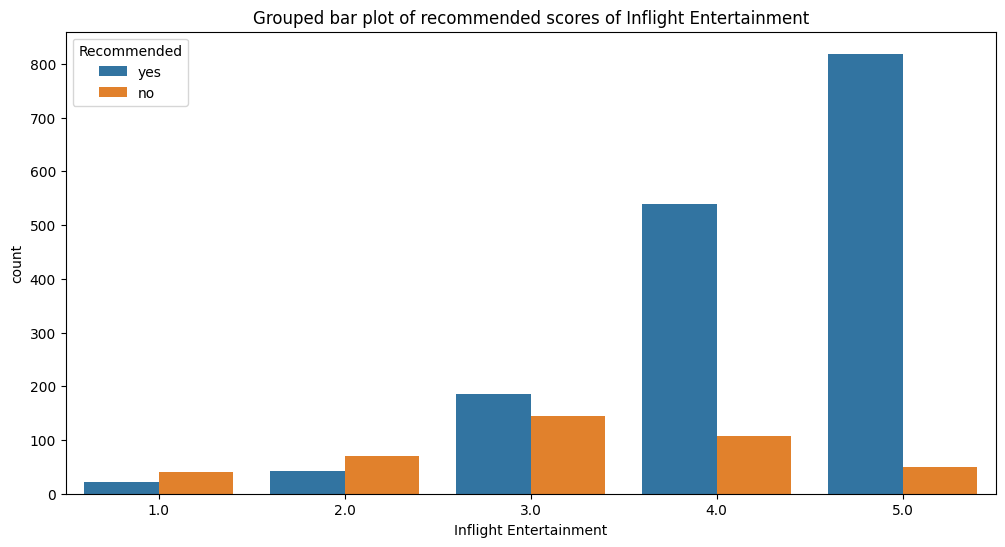

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Inflight Entertainment'], data=df, hue='Recommended')
#plt.ylabel('Inflight Entertainment')
plt.title('Grouped bar plot of recommended scores of Inflight Entertainment')

# Add space between subplots
#plt.subplots_adjust(hspace=1)

#Cabin Staff Service

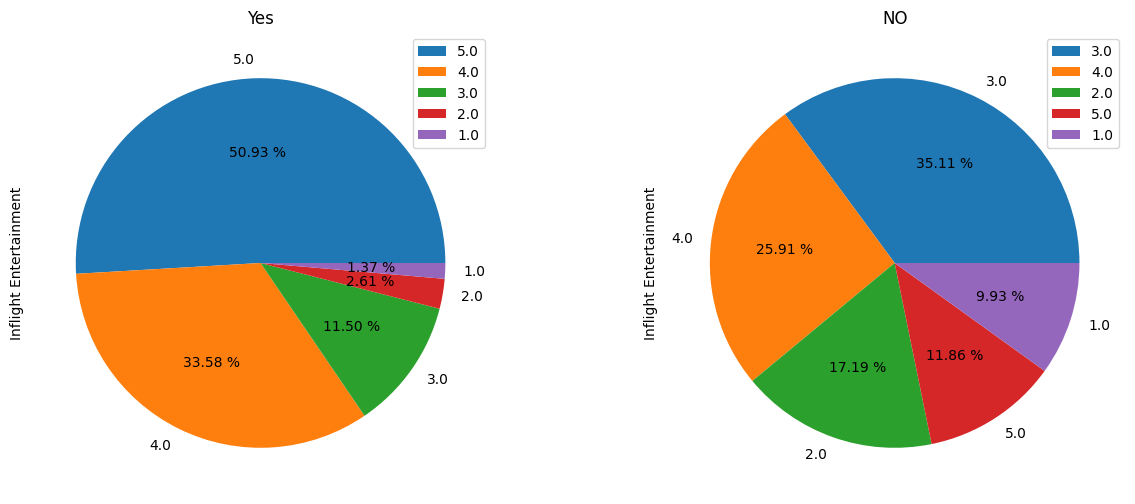

In [ ]:
# Distribution of Inflight Entertainment ratings amidst customers who recommended and did not

yes=df[df['Recommended']=='yes']['Inflight Entertainment'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Inflight Entertainment'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Inflight Entertainment', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1


Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Wifi & Connectivity')

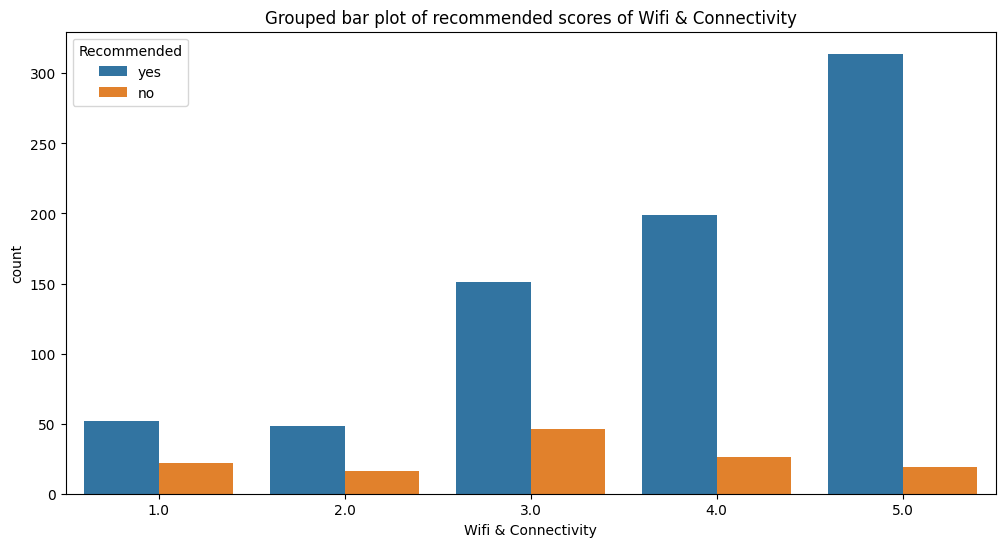

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Wifi & Connectivity'], data=df, hue='Recommended')
plt.title('Grouped bar plot of recommended scores of Wifi & Connectivity')

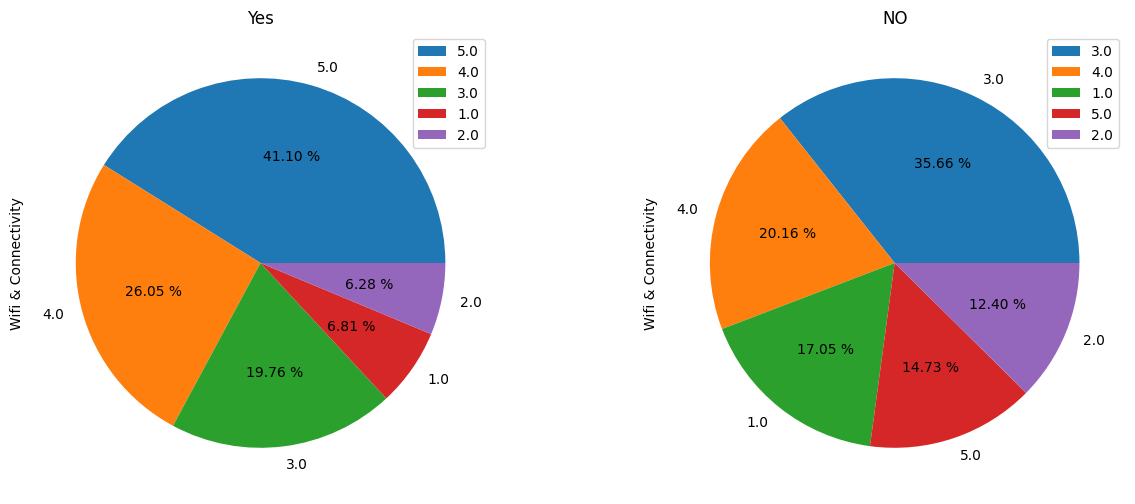

In [ ]:
# Distribution of Wifi & Connectivity ratings amidst customers who recommended and did not


yes=df[df['Recommended']=='yes']['Wifi & Connectivity'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Wifi & Connectivity'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Wifi & Connectivity', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1

Text(0.5, 1.0, 'Grouped bar plot of recommended scores of Value For Money')

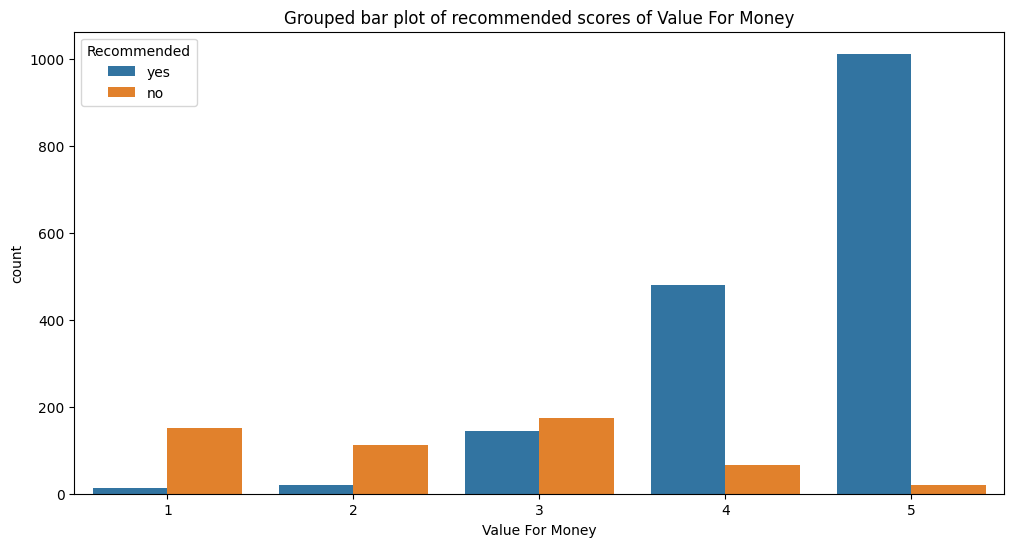

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Value For Money'], data=df, hue='Recommended')
plt.title('Grouped bar plot of recommended scores of Value For Money')

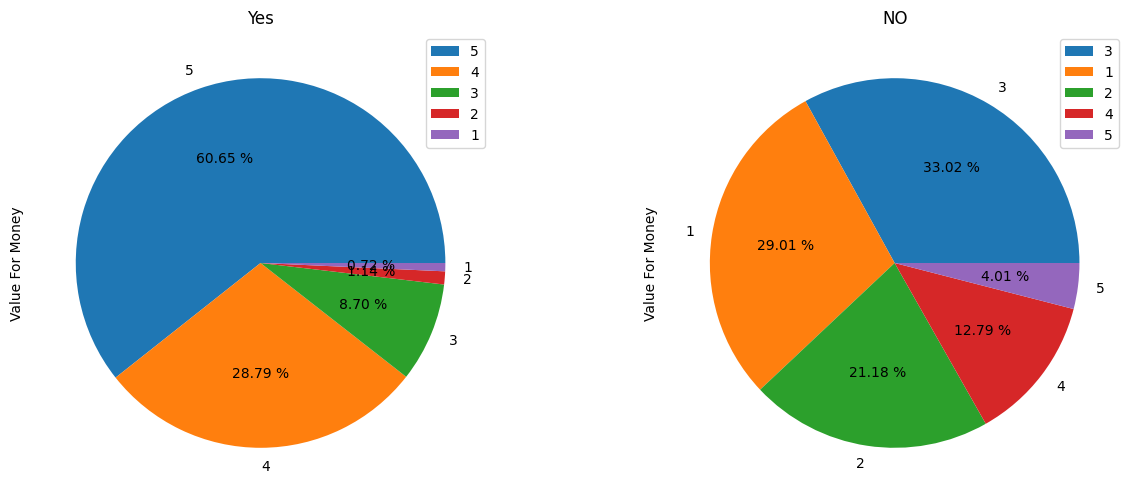

In [ ]:
# Distribution of Value For Money ratings amidst customers who recommended and did not

yes=df[df['Recommended']=='yes']['Value For Money'].value_counts().to_frame()
no=df[df['Recommended']=='no']['Value For Money'].value_counts().to_frame()

#define number of rows and columns for subplots
nrow=1
ncol=2

# make a list of all dataframes
df_list = [yes, no]
title_list=['Yes', 'NO']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6), squeeze=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='pie', y='Value For Money', autopct='%.2f %%',ax=axes[r,c], title=title_list[count], xlabel='')
        count+=1

In [ ]:
# Extracting Date Features
date_col = pd.to_datetime(df['Date Flown'])
df['YearFlown'] = date_col.dt.year.astype('Int64')
df['MonthFlown'] = date_col.dt.month.astype('Int64')
df['DayFlown'] = date_col.dt.day.astype('Int64')


Text(0.5, 1.0, 'Line plot of recommended scores through the Years')

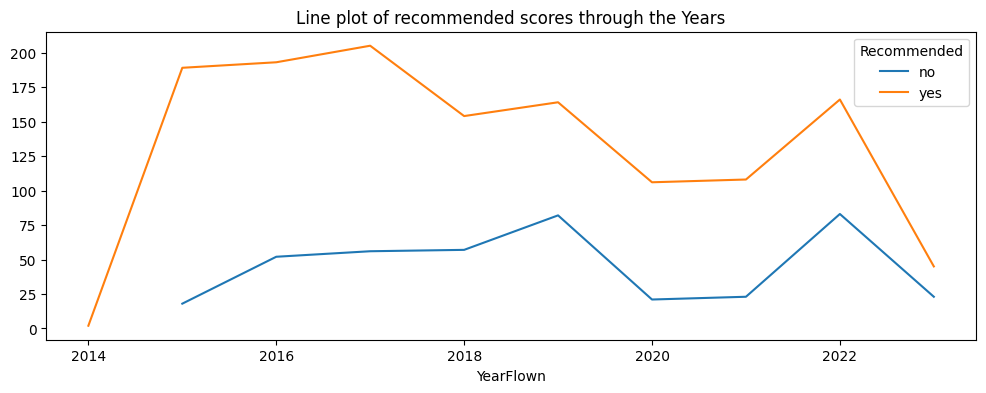

In [ ]:
# Line plot of recommended scores through the Years
df.groupby(['YearFlown'])['Recommended'].value_counts().to_frame().rename(columns={'Recommended': 'Count'}). \
reset_index().pivot(index='YearFlown', columns='Recommended', values='Count').plot(kind='line', figsize=(12,4))
plt.title('Line plot of recommended scores through the Years')

Text(0.5, 1.0, 'Number of flights through the year from 2014-2023')

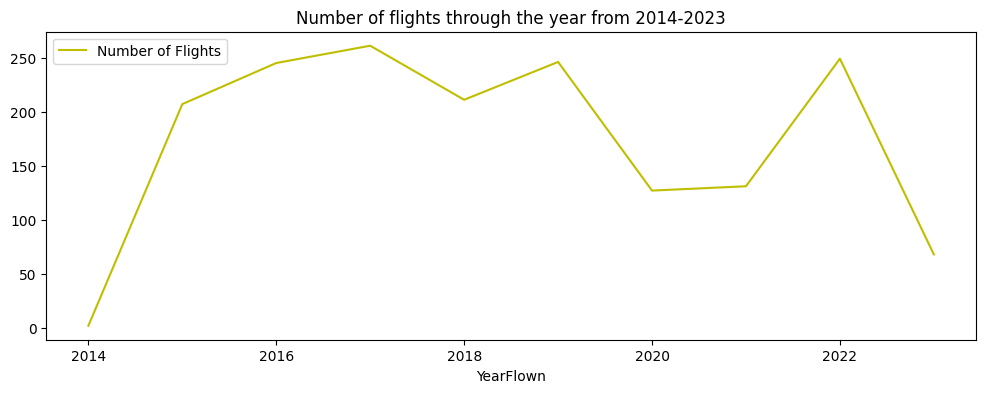

In [ ]:
#Number of flights through the year from 2014-2023
df.groupby('YearFlown')['YearFlown'].count().to_frame().rename(columns={'YearFlown': 'Number of Flights'}).plot(kind='line', figsize=(12,4), color='y')
plt.title('Number of flights through the year from 2014-2023')

Text(0.5, 1.0, 'Line plot of recommended scores of month')

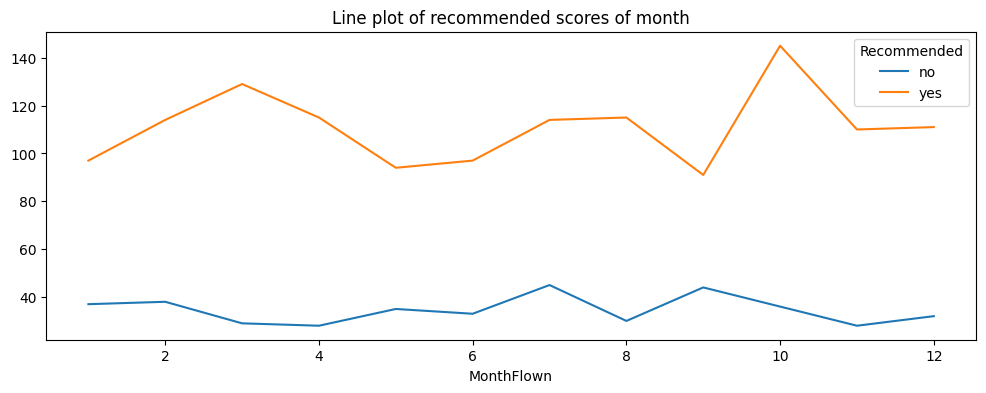

In [ ]:
#Line plot of recommended scores of month-
df.groupby(['MonthFlown'])['Recommended'].value_counts().to_frame().rename(columns={'Recommended': 'Count'}). \
reset_index().pivot(index='MonthFlown', columns='Recommended', values='Count').plot(kind='line', figsize=(12,4))

plt.title('Line plot of recommended scores of month')

Text(0.5, 1.0, 'Number of flights through the months(January to December)')

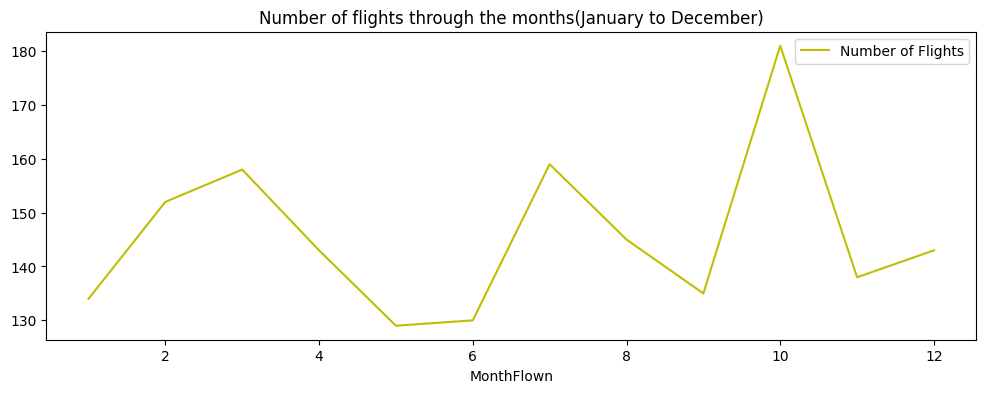

In [ ]:
#Number of flights through the the months(January to December)
df.groupby('MonthFlown')['MonthFlown'].count().to_frame().rename(columns={'MonthFlown': 'Number of Flights'}).plot(kind='line', figsize=(12,4), color='y')
plt.title('Number of flights through the months(January to December)')

Text(0.5, 1.0, 'Average rating of service given by those who will recommend and those who will not recommend')

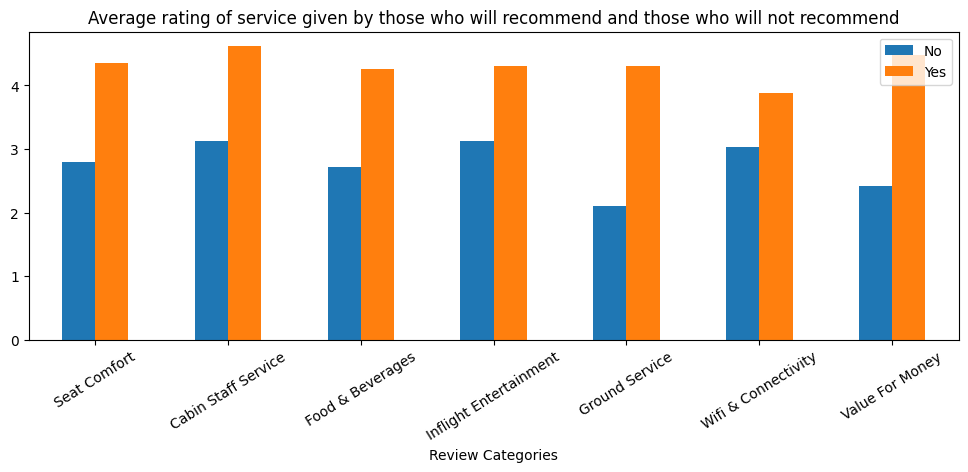

In [ ]:
# average rating of service given by those who will recommend and those who will not recommend
df1=df[df['Recommended']== 'no'].loc[:, 'Seat Comfort': 'Value For Money'].mean().to_frame()
df2=df[df['Recommended']== 'yes'].loc[:, 'Seat Comfort': 'Value For Money'].mean().to_frame()
df_merged=pd.concat([df1, df2], axis=1).reset_index()
df_merged.columns=['Review Categories', 'No', 'Yes']
df_merged.set_index('Review Categories').plot(kind='bar', figsize=(12, 4), rot=32)
plt.title('Average rating of service given by those who will recommend and those who will not recommend')

# **Machine Learning**

### Data Processing for Machine Learning

**Dealing with Missing values**





In [ ]:
df.isna().sum()

Title                        0
Date_Published               0
Country                      0
Name                         0
Overall_rating               0
Review Text                  0
Aircraft                  1012
Type Of Traveller          435
Seat Type                    0
Route                      438
Date Flown                 444
Seat Comfort                37
Cabin Staff Service         38
Food & Beverages            60
Inflight Entertainment     170
Ground Service             459
Wifi & Connectivity       1298
Value For Money              0
Recommended                  0
YearFlown                  444
MonthFlown                 444
DayFlown                   444
dtype: int64

In [ ]:
# deleting Aircraft and wifi&connectivity because more than 50% of the data is missing
df.drop('Aircraft', axis=1, inplace =True)
df.drop('Wifi & Connectivity',axis=1, inplace =True)

In [ ]:
# Fill missing values
df.fillna(-9999, inplace=True)

In [ ]:
df.isna().sum()

Title                     0
Date_Published            0
Country                   0
Name                      0
Overall_rating            0
Review Text               0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Inflight Entertainment    0
Ground Service            0
Value For Money           0
Recommended               0
YearFlown                 0
MonthFlown                0
DayFlown                  0
dtype: int64

In [ ]:
df.shape

(2191, 20)

**Encoding  columns that are needed for the machine learning model**

In [ ]:
seat_type = pd.get_dummies(df['Seat Type'], drop_first=True)
types_traveler =pd.get_dummies(df['Type Of Traveller'], drop_first =True)

In [ ]:
# concating the columns with the table. i.e df
df= pd.concat([df, seat_type, types_traveler], axis = 1)

**Droping the columns that will not be needed for the ML model**

In [ ]:
# Droping the columns that will not be needed for the ML model
df.drop(['Title','Date_Published','Name','Overall_rating','Review Text','Seat Type',
         'Type Of Traveller','Date Flown','Route', ], axis = 1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['country']= LabelEncoder.fit_transform(df['Country'])
df['recommended']= LabelEncoder.fit_transform(df['Recommended'])
df.drop(['Recommended'], axis = 1, inplace=True)
df.drop(['Country'], axis = 1, inplace = True)

In [ ]:
df.head(5)

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,YearFlown,MonthFlown,DayFlown,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure,country,recommended
0,4.0,5.0,3.0,5.0,4.0,4,2023,4,1,0,0,0,0,0,0,1,78,1
1,5.0,5.0,4.0,5.0,5.0,4,2023,3,1,0,0,0,0,0,0,1,78,1
2,5.0,5.0,3.0,5.0,4.0,5,2023,3,1,0,0,0,0,0,0,1,78,1
3,5.0,5.0,4.0,4.0,5.0,5,2023,5,1,0,0,0,0,0,0,1,65,1
4,4.0,5.0,4.0,3.0,4.0,4,2023,5,1,1,0,0,0,0,1,0,36,1


In [ ]:
X= df.drop('recommended', axis=1)
y= df['recommended']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
#feature scaling, so that they will be on the same scale
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier1.predict(X_test)
f1_score(y_test, y_pred)

0.928846153846154

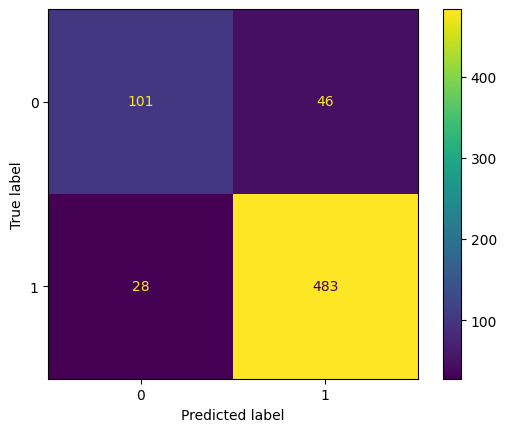

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier1.classes_)
disp.plot()
plt.show()

In [ ]:
coef=pd.DataFrame(classifier1.coef_)
coef.columns = X.columns
coef.T.reset_index()

,index,0
0,Seat Comfort,-0.102732
1,Cabin Staff Service,-0.047927
2,Food & Beverages,0.259094
3,Inflight Entertainment,0.222912
4,Ground Service,0.239811
5,Value For Money,2.173855
6,YearFlown,-0.059128
7,MonthFlown,-0.042233
8,DayFlown,-0.053737
9,Economy Class,-0.416932


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC(kernel= 'rbf',random_state=0)
classifier2.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred2 = classifier2.predict(X_test)
f1_score(y_test, y_pred2)

0.9295774647887325

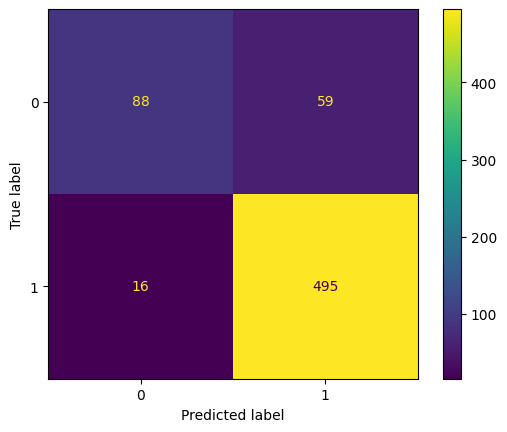

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred2, labels=classifier2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier2.classes_)
disp.plot()
plt.show()

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = classifier3.predict(X_test)
f1_score(y_test, y_pred3)

0.9486931268151017

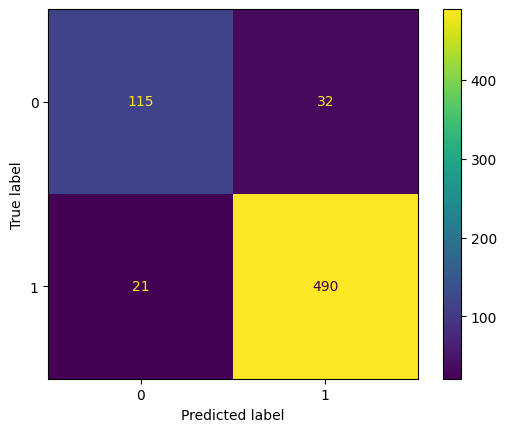

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred3, labels=classifier3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier3.classes_)
disp.plot()
plt.show()

Text(0.5, 0, 'Relative Importance')

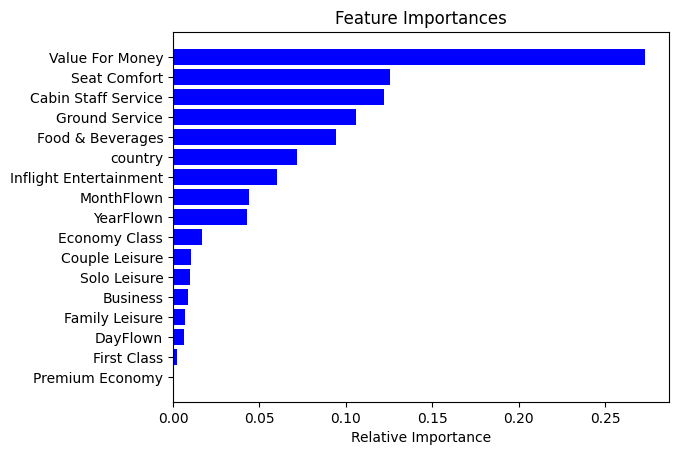

In [ ]:
# random Forest Feature importance
features=X.columns
importances = classifier3.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## CatBoostClassifier

In [ ]:
! pip install catboost
from catboost import CatBoostClassifier
classifier4 = CatBoostClassifier(verbose=0)
classifier4.fit(X_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.7 MB/s eta 0:00:00


In [ ]:
y_pred4 = classifier4.predict(X_test)
f1_score(y_test, y_pred4)

0.9467570183930301

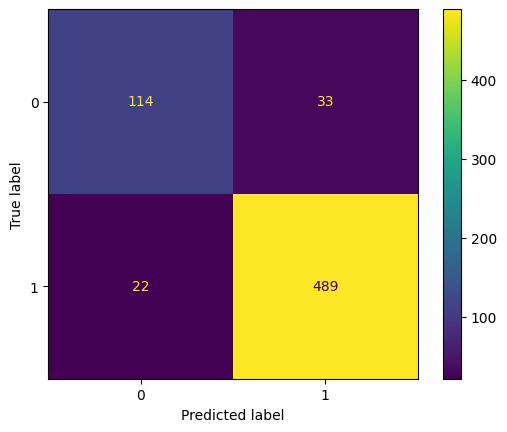

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred4, labels=classifier4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier4.classes_)
disp.plot()
plt.show()

## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
classifier5 =LGBMClassifier()
classifier5.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred5 = classifier5.predict(X_test)
f1_score(y_test, y_pred5)

0.952657004830918

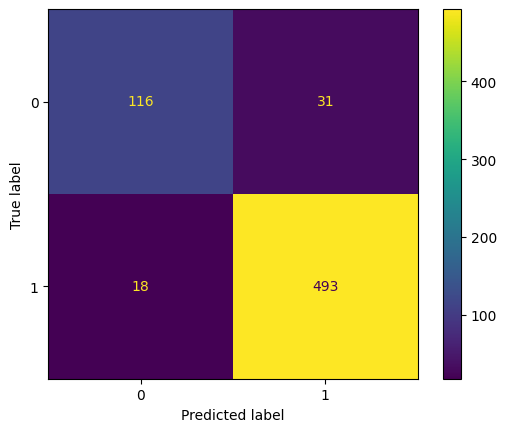

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred5, labels=classifier5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier5.classes_)
disp.plot()
plt.show()

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred6= classifier6.predict(X_test)
f1_score(y_test, y_pred6)

0.9432146294513954

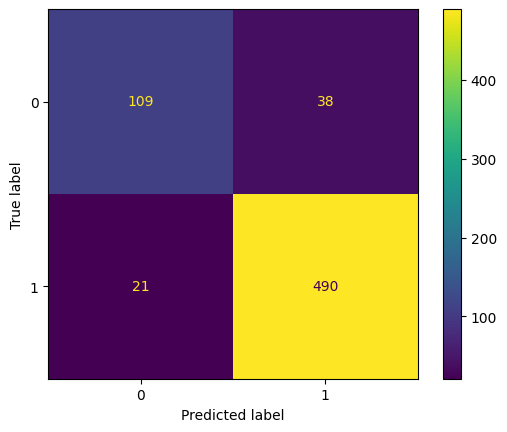

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred6, labels=classifier6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier6.classes_)
disp.plot()
plt.show()